In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [ ]:
# generate nonlinear dataset
X, y = make_moons(n_samples=2000, noise=0.15, random_state=42)


          X         Y  class
0  1.711773  0.250793      1
1  0.374424  0.947715      0
2  0.492962 -0.294469      1
3 -0.945103  0.098870      0
4  0.534770 -0.362848      1


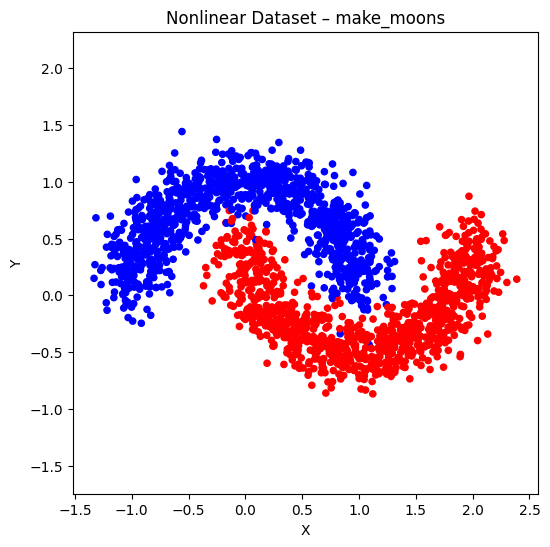

In [ ]:
# convert to DataFrame
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

# show first few rows
print(df.head())

# plot
plt.figure(figsize=(6, 6))
plt.scatter(df['X'], df['Y'], c=df['class'], cmap='bwr', s=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nonlinear Dataset – make_moons')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42
                                                )

In [ ]:
#normalize the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# its better to use more complex and bigger network to show proper example of how batch normalization improves performance
# in this case ,since the network is small..it might not be  as effective..but still better to use batchnormalization

In [ ]:
model= Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4234 - loss: 0.6763 - val_accuracy: 0.7071 - val_loss: 0.6717
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6696 - loss: 0.6684 - val_accuracy: 0.7250 - val_loss: 0.6562
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7273 - loss: 0.6476 - val_accuracy: 0.7357 - val_loss: 0.6392
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7477 - loss: 0.6295 - val_accuracy: 0.7536 - val_loss: 0.6220
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7375 - loss: 0.6197 - val_accuracy: 0.7607 - val_loss: 0.6050
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7773 - loss: 0.5925 - val_accuracy: 0.7750 - val_loss: 0.5876
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7771 - loss: 0.5764 - val_accuracy: 0.7821 - val_loss: 0.5714
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.5510 - val_accuracy: 0.7964 -

In [ ]:
from keras.layers import Dense, BatchNormalization, Activation

In [ ]:
## Using Batch Normalization (Best Practice)

model = Sequential()

# First layer: Dense -> BatchNorm -> Activation
model.add(Dense(2, input_dim=2))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Second layer: Dense -> BatchNorm -> Activation
model.add(Dense(2))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output layer (no BatchNorm needed here)
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history2= model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5182 - loss: 0.7242 - val_accuracy: 0.2036 - val_loss: 0.6970
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5727 - loss: 0.7069 - val_accuracy: 0.6643 - val_loss: 0.6909
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6305 - loss: 0.6901 - val_accuracy: 0.7786 - val_loss: 0.6861
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6763 - loss: 0.6725 - val_accuracy: 0.6929 - val_loss: 0.6817
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7369 - loss: 0.6624 - val_accuracy: 0.7286 - val_loss: 0.6742
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7870 - loss: 0.6505 - val_accuracy: 0.7393 - val_loss: 0.6625
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8249 - loss: 0.6378 - val_accuracy: 0.7714 - val_loss: 0.6479
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8100 - loss: 0.6280 - val_accuracy: 0.7643 - 

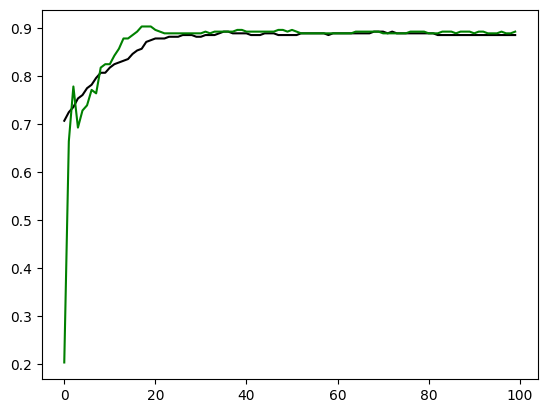

In [ ]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')